## Analyzing the Stroop Effect

Perform the analysis in the space below. Remember to follow the instructions and review the project rubric before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.

(1) What is the independent variable? What is the dependent variable?

The independent variable is words condition. The dependent variable is time to name the ink colors.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

Null hypothesis: The time it takes to read the incongruent words is equal or less than that it takes to read the congruent wrods. H0: Tincongruent <= Tcongruent Alternative hypothesis: The time it takes to read the incongruent words is greater than that it takes to read the congruent words. H1: Tincongruent > Tcongruent

Sampling distribution and bootstrapping will be used to build the confidence interval for the difference of the average time spent on reading the congruent and incongruent words groups. If the difference does not contain zero, then it suggests that there is truly a difference between the two groups.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('stroopdata.csv')

In [3]:
df.mean()

Congruent      14.051125
Incongruent    22.015917
dtype: float64

In [4]:
df.std()

Congruent      3.559358
Incongruent    4.797057
dtype: float64

Incongruent group has an average longer reading time than congrouent group. But the incongruent group also has a larger standard deviation than the congruent group.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

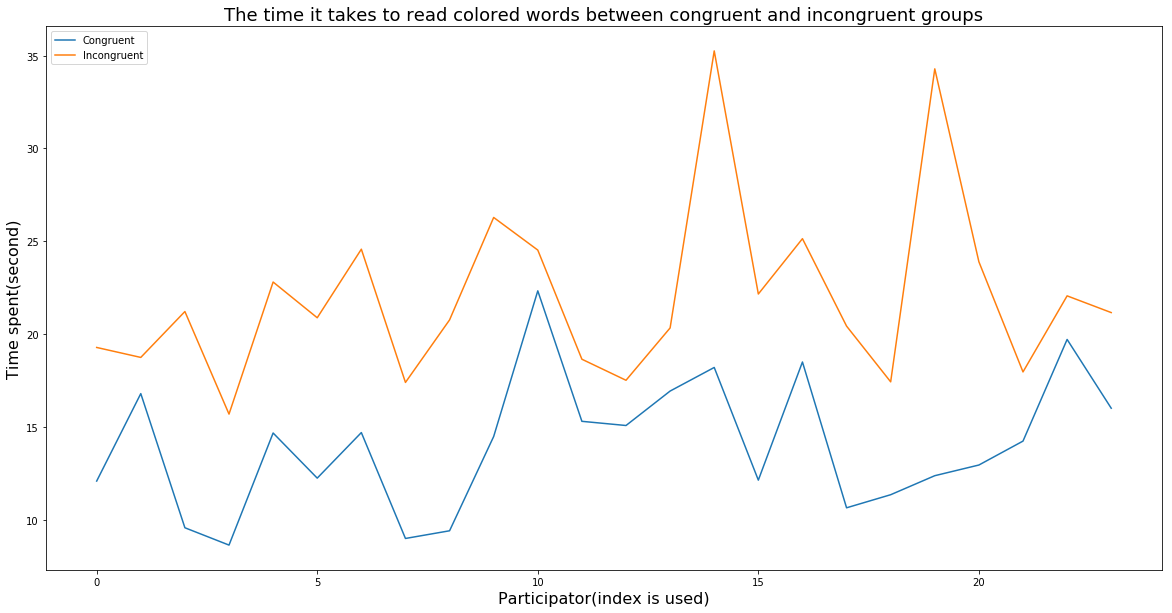

In [5]:
plt.figure(figsize=(20,10))
plt.plot(df.index, df['Congruent'])
plt.plot(df.index, df['Incongruent'])
plt.legend(['Congruent', 'Incongruent'], loc='upper left')
plt.xlabel('Participator(index is used)', fontsize=16)
plt.ylabel('Time spent(second)', fontsize=16)
plt.title('The time it takes to read colored words between congruent and incongruent groups', fontsize=18)
plt.show()

This line shows that incongruent group spends more time to read the colored words than congruent group.

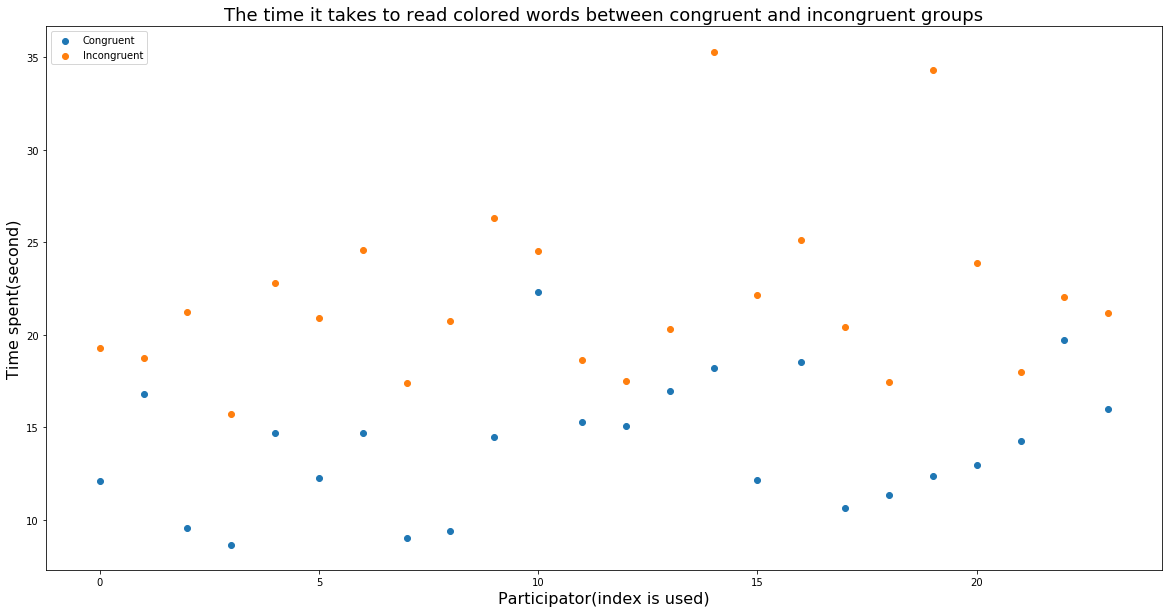

In [6]:
plt.figure(figsize=(20,10))
plt.scatter(df.index, df['Congruent'])
plt.scatter(df.index, df['Incongruent'])
plt.legend(['Congruent', 'Incongruent'], loc='upper left')
plt.xlabel('Participator(index is used)', fontsize=16)
plt.ylabel('Time spent(second)', fontsize=16)
plt.title('The time it takes to read colored words between congruent and incongruent groups', fontsize=18)
plt.show()

The scatter plot also shows clearly that incongruent group has a longer time to read words that congruent group.

(5) Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? Hint: Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [7]:
diff=[]
for _ in range(10000):
    bootsample=df.sample(df.shape[0], replace=True)
    mean_congruent=bootsample['Congruent'].mean()
    mean_incongruent=bootsample['Incongruent'].mean()
    diff.append(mean_incongruent-mean_congruent)

In [8]:
t_congruent=df['Congruent'].mean()
t_incongruent=df['Incongruent'].mean()
obs_diff=t_incongruent-t_congruent

(array([4.400e+01, 3.640e+02, 1.370e+03, 2.796e+03, 2.802e+03, 1.736e+03,
        6.820e+02, 1.760e+02, 2.800e+01, 2.000e+00]),
 array([ 4.805375  ,  5.56048333,  6.31559167,  7.0707    ,  7.82580833,
         8.58091667,  9.336025  , 10.09113333, 10.84624167, 11.60135   ,
        12.35645833]),
 <a list of 10 Patch objects>)

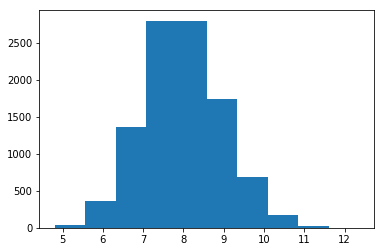

In [9]:
plt.hist(diff)

In [10]:
np.percentile(diff, 2.5), np.percentile(diff, 97.5)

(6.136973958333335, 9.96672916666666)

In [11]:
null_diffs=np.random.normal(0,np.std(diff),10000)
p_value=(null_diffs > obs_diff).mean()
p_value

0.0

The confidence interval is between 6.140 and 9.980 which does not contain 0. Type I error is 5%. P value < 0.5. This means we reject the null hypothesis. And we conclude that the time it takes to read the incongruent words is greater than that it takes to read the congruent words.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

It is possible that the participators read the congruent words first, then their eyes get tired to read the incongruent words and, thus, result in the longer time to read the incongruent words. Similar task such as person test for sprints twice in a row. The second time take longer than the first time.

1. https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter
2. Udacity statistics courses